In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation

# parameter values

b = 0.5   # friction coefficient
g = 9.8    # gravity acceleration
H = 10   # mean height of the surface


# discretize the space (x, y) and time (t)

xs = np.linspace(0, 10, 100)
ys = np.linspace(0, 10, 100)
ts = np.linspace(0, 1, 1024)

dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
dt = ts[1] - ts[0]

x, y = np.meshgrid(xs, ys)


# finite difference treatment of grad h = [h(x+∆x) - h(x-∆x)]/(2∆x)

def grad(h):
    grad_h_x = (np.roll(h, -1, axis = 0) - np.roll(h, 1, axis = 0))/(2*dx)
    grad_h_x[0, :] = 0   # boundary condition: reflecting
    grad_h_x[-1, :] = 0  # boundary condition: reflecting

    grad_h_y = (np.roll(h, -1, axis = 1) - np.roll(h, 1, axis = 1))/(2*dy)
    grad_h_y[:, 0] = 0   # boundary condition: reflecting
    grad_h_y[:, -1] = 0  # boundary condition: reflecting
    
    return np.array([grad_h_x, grad_h_y])


# finite difference treatment of div v

def div(vec):
    return np.gradient(vec[0], axis = 0)/dx + np.gradient(vec[1], axis = 1)/dy


# prepare the list to store the numerical solutions

h_list = []
v_list = []


# initial condition: a single Gaussian pulse, no initial velocities

h_init = np.exp( (- (x/10 - 0.2)**2 - (y/10 - 0.2)**2) / (2 * 0.05**2) )
v_init = np.zeros(grad(x).shape)


# store the initial condition into the lists

h_list.append(h_init)
v_list.append(v_init)


# add another Gaussian pulse at a stochastic position (not used)

def add_a_drop(h):
    return h + 0.5 * np.exp(  (- (x - np.random.normal())**2 - (y - np.random.random())**2) / (2 * 0.02**2)  )


# start the simulation, for loop over the descritized time
omega = 7.2921e-5
phi = 30 * np.pi / 180
f = 2 * omega * np.sin(phi)

for i in range(1, len(ts)):
    
    v = np.zeros(v_init.shape)
    v[0] = (1 - dt * b) * v_list[-1][0] - dt * g * grad(h_list[-1])[0] + dt * f * v_list[-1][1]
    v[1] = (1 - dt * b) * v_list[-1][1] - dt * g * grad(h_list[-1])[1] - dt * f * v_list[-1][0]
    
    #v[0] = (1 - dt * b) * v_list[-1][0] - dt * g * grad(h_list[-1])[0] 
    #v[1] = (1 - dt * b) * v_list[-1][1] - dt * g * grad(h_list[-1])[1] 
    
    h = h_list[-1] - dt * H * div(v)

    h[0, :] = h[1, :]
    h[-1, :] = h[-2, :]
    h[:, 0] = h[:, 1]
    h[:, -1] = h[:, -2]
    
    v_list.append(v)
    h_list.append(h)

<IPython.core.display.Javascript object>


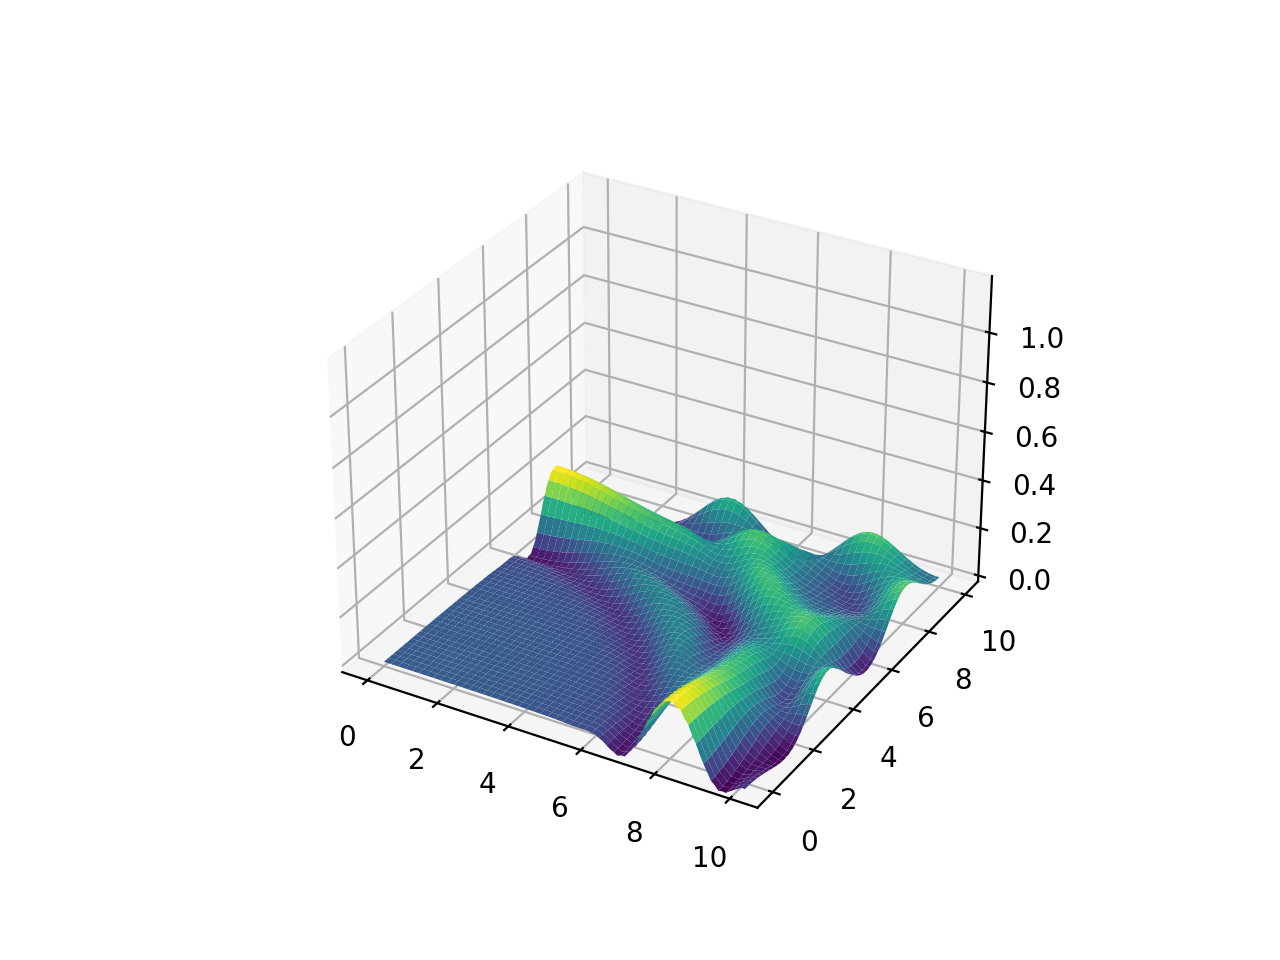

In [78]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

%matplotlib notebook


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_zlim(0, 1.2 * np.max(h_list))

surf = ax.plot_surface(x, y, h_list[0], cmap='viridis')

def update(frame):
    global surf
    surf.remove()
    surf = ax.plot_surface(x, y, h_list[frame], cmap='viridis')

#ani = animation.FuncAnimation(fig, update, frames=len(h_list), interval=10, repeat=False)
ani = animation.FuncAnimation(fig, update, frames=range(0, len(h_list)), interval=10, repeat=False)

plt.show()
